<a href="https://colab.research.google.com/github/askolesov0608/SJK0015/blob/main/chap3_FIN_Vid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Robotics, Vision & Control 3e: for Python
## Chapter 3: Time and Motion

Copyright (c) 2021- Peter Corke

In [ ]:
try:
    from google.colab import output
    print('Running on CoLab')
    output.enable_custom_widget_manager()
    !pip install ipympl
    !pip install spatialmath-python
    !pip install roboticstoolbox-python>=1.0.2
    !pip install --no-deps rvc3python
    COLAB = True

except ModuleNotFoundError:
    COLAB = False

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr_or_assign"

from IPython.display import HTML
import urllib.request

# add RTB examples folder to the path
import sys, os.path
import roboticstoolbox as rtb
import RVC3
# sys.path.append(os.path.join(rtb.__path__[0], 'examples'))
sys.path.append(os.path.join(RVC3.__path__[0], 'examples'))

# standard imports
import numpy as np
import matplotlib.pyplot as plt
import math
from math import pi
np.set_printoptions(
    linewidth=120, formatter={
        'float': lambda x: f"{0:8.4g}" if abs(x) < 1e-10 else f"{x:8.4g}"})
np.random.seed(0)
from spatialmath import *
from spatialmath.base import *
from roboticstoolbox import quintic, trapezoidal, mtraj, mstraj, xplot, ctraj
%matplotlib widget
import matplotlib.pyplot as plt

Running on CoLab
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.9/184.9 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.2/204.2 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 40.9 MB/s eta 0:00:00
  Created wheel for colored: filename=colored-1.4.4-py3-none-any.whl size=14249 sha256=7c1ab16ec16aec451ce2f265863a07a52308d61ab2fbb2526d9f9901253c19a8
  Stored in directory: /root/.cache/pip/wheels/e7/c3/07/fabb0941ff5df7a487d43a67081273045536cc96d4d0e816b4
Successfully built colored
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.0/174.0 kB 1.7 MB/s eta 0:00:00


There are some minor code changes compared to the book. These are to support
the Matplotlib widget (ipympl) backend.  This allows 3D plots to be rotated
so the changes are worthwhile.

# 3.1 Time-Varying Pose


## 3.1.3 Transforming Spatial Velocities


In [ ]:
pip install roboticstoolbox-python --upgrade

In [ ]:
from spatialmath import SE3
import numpy as np
from roboticstoolbox.backends.PyPlot import PyPlot
import matplotlib.pyplot as plt
from math import pi
import roboticstoolbox as rtb
from roboticstoolbox.backends.PyPlot import PyPlot


Exercise on Lub2. Movie for moving coordinate

In [ ]:
# Определение начальной и конечной позиций
T0 = SE3.Trans([0, 0, 0])  # Начальная позиция
T1 = SE3.Trans([1, -1, -2])  # Конечная позиция

   1         0         0         1         
   0         1         0        -1         
   0         0         1        -2         
   0         0         0         1         


In [ ]:
# Создание траектории
traj_q = trapezoidal(0, 1, 50).q  # Генерация трапецеидальной траектории
Ts = T0.interp(T1, traj_q)  # Интерполяция между T0 и T1

In [ ]:
HTML(Ts.animate(movie=True, dim=1.5))

In [ ]:
aTb = SE3.Tx(-2) * SE3.Rz(-pi/2) * SE3.Rx(pi/2);
R = aTb

   0         0        -1        -2         
  -1         0         0         0         
   0         1         0         0         
   0         0         0         1         


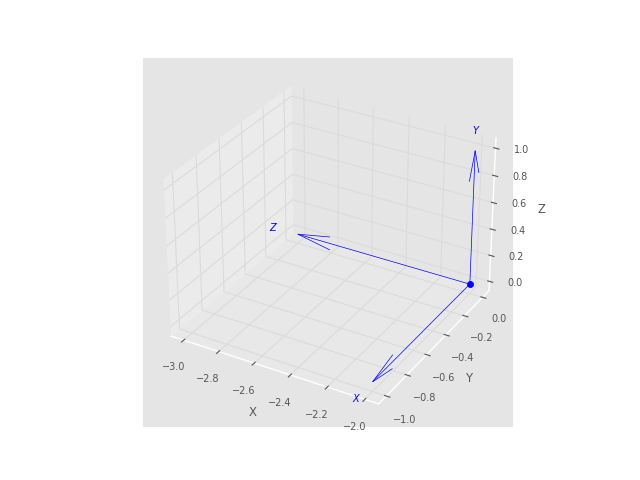

In [ ]:
# Визуализация
fig = plt.figure()  # Создание фигуры для визуализации
ax = fig.add_subplot(111, projection='3d')  # Добавление 3D подграфика
R.plot(ax=ax)  # Визуализация преобразования
plt.show()  # Отображение фигуры

In [ ]:
bV = [1, 2, 3, 4, 5, 6];
R1 = bV

[1, 2, 3, 4, 5, 6]

In [ ]:
aJb = aTb.jacob();
aJb.shape
aV = aJb @ bV

array([      -3,       -1,        2,       -6,       -4,        5])

In [ ]:
aV = aTb.Ad() @ [1, 2, 3, 0, 0, 0]

array([      -3,       -1,        2,        0,        0,        0])

In [ ]:
aV = aTb.Ad() @ [0, 0, 0, 1, 0, 0]

array([       0,        0,        2,        0,       -1,        0])

In [ ]:
aV = aTb.Ad() @ [1, 2, 3, 1, 0, 0]

array([      -3,       -1,        4,        0,       -1,        0])

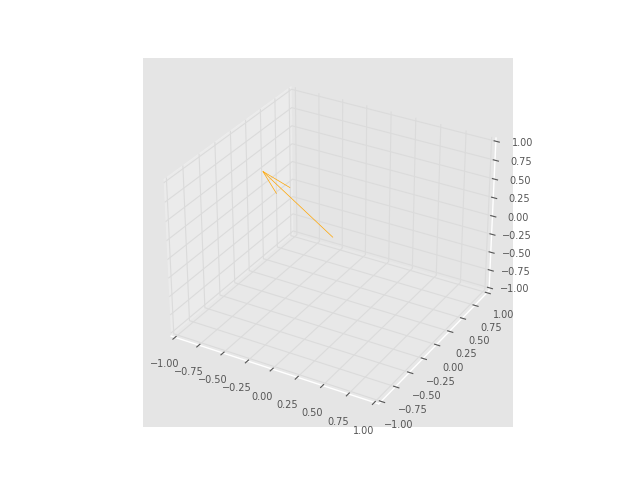

In [ ]:
# Разделяем вектор на трансляционную и вращательную части
trans = aV[:3]  # Трансляционная часть
rot = aV[3:]    # Вращательная часть (может использоваться для визуализации направления вращения)

# Создаем фигуру и 3D подграфик
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Начальная точка вектора (может быть начало координат или другая точка)
start_point = np.array([0, 0, 0])

# Добавляем вектор трансляции на график
ax.quiver(start_point[0], start_point[1], start_point[2], trans[0], trans[1], trans[2], color='orange', length=1.0, normalize=True)

# Настройка границ графика для наглядности
ax.set_xlim([start_point[0]-1, start_point[0]+1])
ax.set_ylim([start_point[1]-1, start_point[1]+1])
ax.set_zlim([start_point[2]-1, start_point[2]+1])

plt.show()

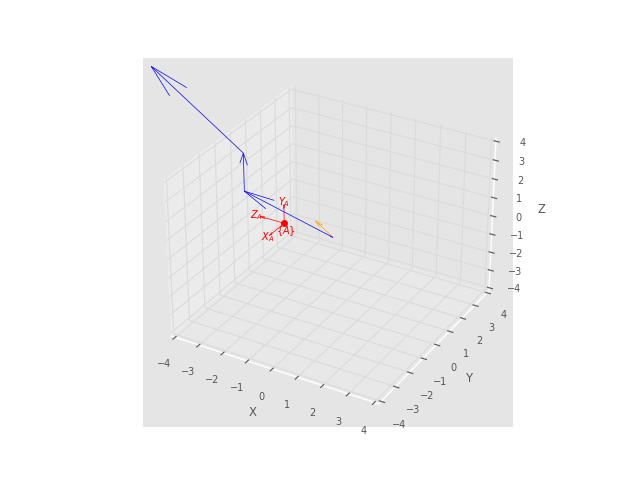

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from spatialmath import SE3
from math import pi

# Определение преобразования aTb и исходного вектора bV
aTb = SE3.Tx(-2) * SE3.Rz(-pi/2) * SE3.Rx(pi/2)
bV = np.array([1, 2, 3, 4, 5, 6])

# Вычисление якобиана и применение его к bV
aJb = aTb.jacob()
aV_jacob = aJb @ bV

# Векторы для преобразования
vectors = [
    [1, 2, 3, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [1, 2, 3, 1, 0, 0]
]

# Функция для визуализации векторов
def plot_vector(ax, start_point, vector, color='blue', length=None, normalize=False):
    """
    Функция для визуализации 3D вектора.

    Args:
    ax (matplotlib.axes._subplots.Axes3DSubplot): Оси для отрисовки.
    start_point (list или np.array): Начальная точка вектора [x, y, z].
    vector (list или np.array): Компоненты вектора [dx, dy, dz].
    color (str): Цвет вектора.
    length (float, optional): Длина вектора для визуализации. Если None, используется длина вектора.
    normalize (bool): Если True, вектор будет нормализован до длины 1 перед визуализацией.
    """
    if normalize:
        vector = vector / np.linalg.norm(vector)
    if length is not None:
        vector = vector * length
    ax.quiver(start_point[0], start_point[1], start_point[2],
              vector[0], vector[1], vector[2], color=color)

# Визуализация преобразования aTb и вектора aV после применения якобиана
aTb.plot(ax=ax, frame='A', color='red')
plot_vector(ax, [0.0, 0.0, 0.0], aV_jacob[:3], color='blue', length=0.1, normalize=True)  # Теперь с нормализацией и регулировкой длины


# Текущее положение для последующих векторов, инициализированное как float
current_position = np.array([0.0, 0.0, 0.0])

# Преобразование и визуализация векторов
for vector in vectors:
    # Применение адаптированной матрицы к вектору
    transformed_vector = aTb.Ad() @ vector
    # Визуализация преобразованного вектора
    plot_vector(ax, current_position, transformed_vector[:3], color='blue')
    # Обновление текущего положения для начала следующего вектора
    current_position += transformed_vector[:3]

# Настройка вида графика
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])
ax.set_zlim([-4, 4])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


## 3.1.4 Incremental Rotation


In [ ]:
rotx(0.001)
R2 = rotx(0.001)

array([[       1,        0,        0],
       [       0,        1,   -0.001],
       [       0,    0.001,        1]])

In [ ]:
# tranimate(R)
plotvol3(new=True)  # for matplotlib/widget
HTML(tranimate(R2, movie=True, dim=2)) # Создает анимацию вращения на основе матрицы R

In [ ]:
import time
Rexact = np.eye(3); Rapprox = np.eye(3);  # null rotation
w = np.array([1, 0, 0]);   # rotation of 1rad/s about x-axis
dt = 0.01;                 # time step
t0 = time.process_time();
for i in range(100):  # exact integration over 100 time steps
  Rexact = Rexact @ trexp(skew(w*dt));  # update by composition
print(time.process_time() - t0)

t0 = time.process_time();
for i in range(100):  # approximate integration over 100 time steps
  Rapprox = Rapprox + Rapprox @ skew(w*dt);  # update by addition
print(time.process_time() - t0)

0.013087145000000078
0.002617421000000064


In [ ]:
np.linalg.det(Rapprox) - 1

0.010049662092876055

In [ ]:
np.linalg.det(Rexact) - 1

-2.886579864025407e-15

In [ ]:
tr2angvec(trnorm(Rexact))

(1.0, array([       1,        0,        0]))

In [ ]:
tr2angvec(trnorm(Rapprox))

(0.999966668666524, array([       1,        0,        0]))

# 3.2 Accelerating Bodies and Reference Frames


## 3.2.1 Dynamics of Moving Bodies


In [ ]:
J = np.array([[ 2, -1, 0],
              [-1,  4, 0],
              [ 0,  0, 3]]);
orientation = UnitQuaternion();  # identity quaternion
w = 0.2 * np.array([1, 2, 2]);

In [ ]:
dt = 0.05;  # time step
def update():
  global orientation, w
  for t in np.arange(0, 10, dt):
     wd = -np.linalg.inv(J) @ (np.cross(w, J @ w))  # (3.12)
     w += wd * dt
     orientation *= UnitQuaternion.EulerVec(w * dt)
     yield orientation.R

# tranimate(update(), dim=1.5);
plotvol3(new=True)
HTML(tranimate(update(), dim=1.5, movie=True))

## 3.2.2 Transforming Forces and Torques


In [ ]:
bW = [1, 2, 3, 0, 0, 0];

In [ ]:
aW = aTb.inv().Ad().T @ bW

array([      -3,       -1,        2,        0,        4,        2])

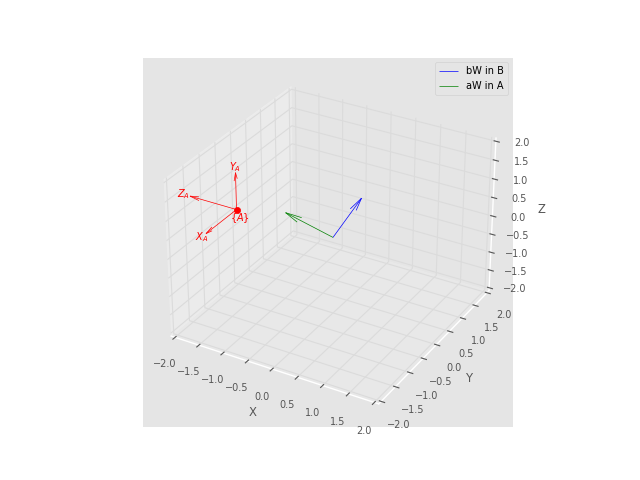

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from spatialmath import SE3, UnitQuaternion
from math import pi

# Определение преобразования aTb и векторов bW и aW
aTb = SE3.Tx(-2) * SE3.Rz(-pi/2) * SE3.Rx(pi/2)
bW = np.array([1, 2, 3, 0, 0, 0])
aW = aTb.inv().Ad().T @ bW

# Создание 3D графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Визуализация системы координат A
aTb.plot(ax=ax, frame='A', color='red', s=0.1)

# Визуализация вектора силы в системе координат B (исходная система)
# Используем только силовую компоненту bW
ax.quiver(0, 0, 0, bW[0], bW[1], bW[2], color='blue', length=1, normalize=True, label='bW in B')

# Визуализация вектора силы в системе координат A (трансформированная система)
# Используем только силовую компоненту aW
ax.quiver(0, 0, 0, aW[0], aW[1], aW[2], color='green', length=1, normalize=True, label='aW in A')

# Настройка вида графика
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_zlim([-2, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()


# 3.3 Creating Time-Varying Pose


## 3.3.1 Smooth One-Dimensional Trajectories


In [ ]:
traj = quintic(0, 1, np.linspace(0, 1, 50));

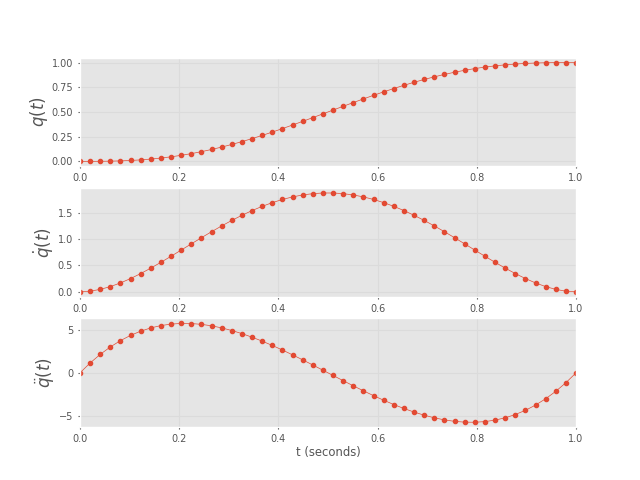

In [ ]:
traj.plot();

In [ ]:
quintic(0, 1, np.linspace(0, 1, 50), qd0=10, qdf=0); #начальной скоростью qd0=10 и конечной скоростью qdf=0.

In [ ]:
qd = traj.qd;
qd.mean() / qd.max()

0.523102222222222

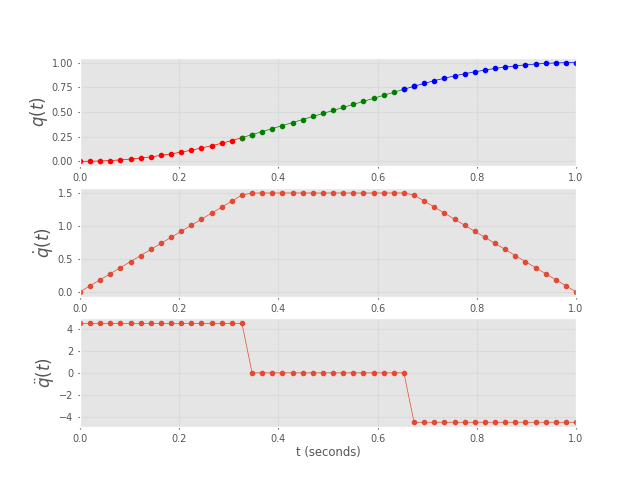

In [ ]:
traj = trapezoidal(0, 1, np.linspace(0, 1, 50));
traj.plot();

In [ ]:
traj.qd.max()

1.5

In [ ]:
traj1_2 = trapezoidal(0, 1, np.linspace(0, 1, 50), V=1.2);
traj2_0 = trapezoidal(0, 1, np.linspace(0, 1, 50), V=1.9);

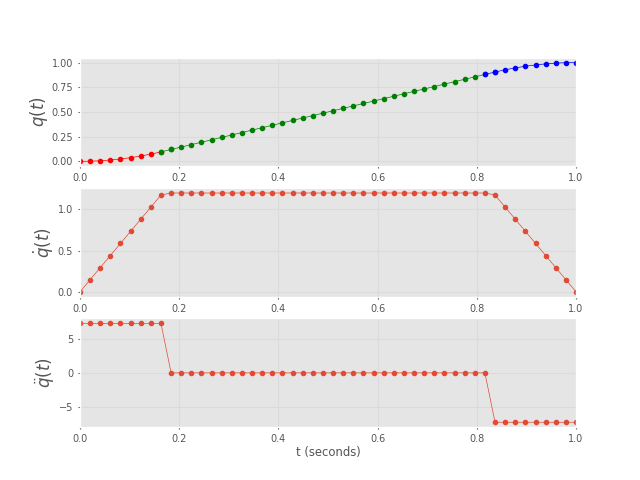

In [ ]:
traj1_2.plot();

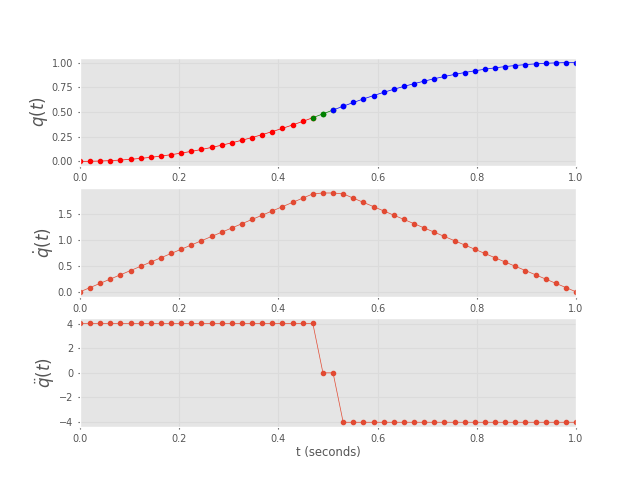

In [ ]:
traj2_0.plot();

## 3.3.2 Multi-Axis Trajectories


In [ ]:
traj = mtraj(trapezoidal, [0, 2], [1, -1], 50);

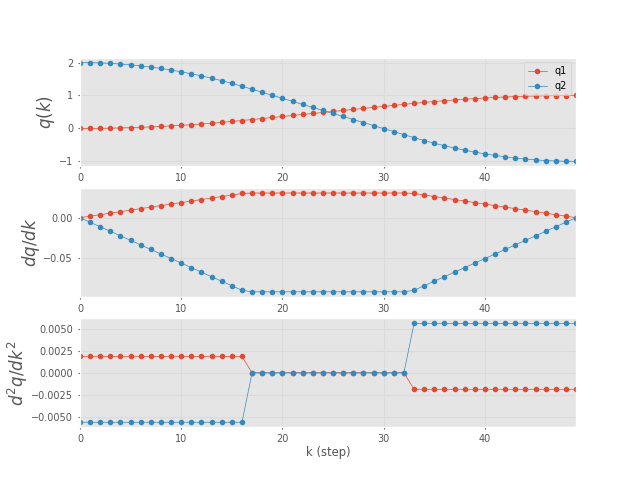

In [ ]:
traj.plot();

In [ ]:
T = SE3.Rand()
q = np.hstack([T.t, T.rpy()])

array([ 0.09763,   0.4304,   0.2055,    2.777,   -1.125,    1.781])

## 3.3.3 Multi-Segment Trajectories


In [ ]:
via = SO2(30, unit="deg") * np.array([[-1, 1, 1, -1, -1], [1, 1, -1, -1, 1]]);
traj0 = mstraj(via.T, dt=0.2, tacc=0, qdmax=[2, 1]);

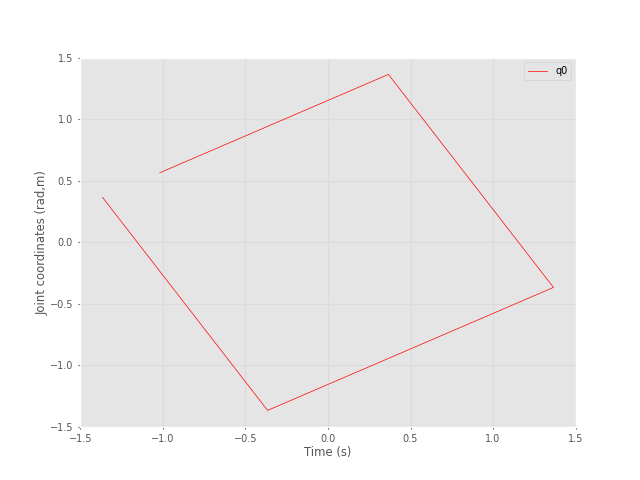

In [ ]:
xplot(traj0.q[:, 0], traj0.q[:, 1], color="red");
#plt.plot(traj0.q[:, 0], traj0.q[:, 1], color="red");

In [ ]:

traj2 = mstraj(via.T, dt=0.2, tacc=2, qdmax=[2, 1]);

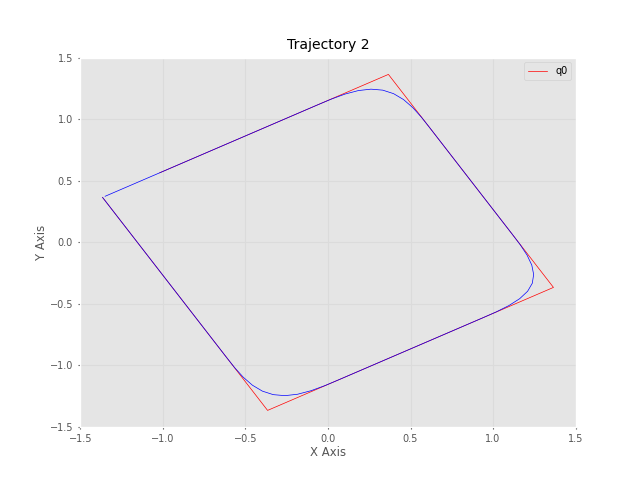

In [ ]:
# Визуализация traj2
plt.plot(traj2.q[:, 0], traj2.q[:, 1], color="blue")  # Измените цвет, если хотите

# Добавление заголовка и меток осей для лучшего понимания графика
plt.title("Trajectory 2")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")

plt.show()

In [ ]:
len(traj0), len(traj2)

(28, 80)

## 3.3.4 Interpolation of Orientation in 3D


In [ ]:
R0 = SO3.Rz(-1) * SO3.Ry(-1);
R1 = SO3.Rz(1) * SO3.Ry(1);

In [ ]:
rpy0 = R0.rpy(); rpy1 = R1.rpy();

In [ ]:
traj = mtraj(quintic, rpy0, rpy1, 50);

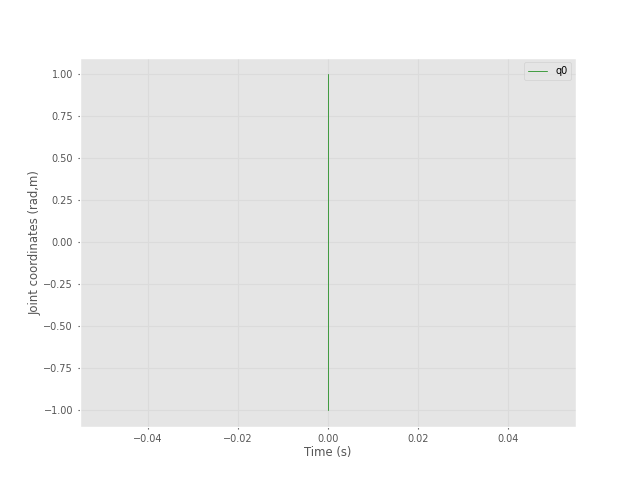

[<Axes: xlabel='Time (s)', ylabel='Joint coordinates (rad,m)'>]

In [ ]:
xplot(traj.q[:, 0], traj.q[:, 1], color="g")  #

In [ ]:
pose = SO3.RPY(traj.q);
len(pose)

50

In [ ]:
# pose.animate()
HTML(pose.animate(movie=True, dim=1.5))

In [ ]:
q0 = UnitQuaternion(R0); q1 = UnitQuaternion(R1);

In [ ]:
qtraj = q0.interp(q1, 50);
len(qtraj)

50

In [ ]:
# qtraj.animate()
plotvol3(new=True)  # for matplotlib/widget
HTML(qtraj.animate(movie=True, dim=1.5))

### 3.3.4.1 Direction of Rotation


In [ ]:
q0 = UnitQuaternion.Rz(-2); q1 = UnitQuaternion.Rz(2);
q = q0.interp(q1, 50);
# q.animate(dim=1.])
plotvol3(new=True)  # for matplotlib/widget
HTML(q.animate(movie=True, dim=1.5))

In [ ]:
q = q0.interp(q1, 50, shortest=True);
# q.animate()
plotvol3(new=True)  # for matplotlib/widget
HTML(q.animate(movie=True, dim=1.5))

## 3.3.5 Cartesian Motion in 3D


In [ ]:
T0 = SE3.Trans([0.4, 0.2, 0]) * SE3.RPY(0, 0, 3);
T1 = SE3.Trans([-0.4, -0.2, 0.3]) * SE3.RPY(-pi/4, pi/4, -pi/2);

In [ ]:
T0.interp(T1, 0.5)
# Зачем?
#Интерполирует между T0 и T1 в точке, которая находится на половине пути между ними. Это дает промежуточную позицию.

   0.09754  -0.702     0.7055    0         
   0.702     0.551     0.4512    0         
  -0.7055    0.4512    0.5465    0.15      
   0         0         0         1         


In [ ]:
Ts = T0.interp(T1, 100); #почему 51???  Генерирует последовательность из 51 промежуточной позиции между T0 и T1, создавая плавную траекторию.

In [ ]:
len(Ts)

100

In [ ]:
#Ts.animate()
plotvol3(new=True)  # for matplotlib/widget
HTML(Ts.animate(movie=True, dim=1.5))

In [ ]:
Ts[25] #Получает 26-ю позицию из последовательности Ts, которая соответствует примерно середине траектории

  -0.5616   -0.7863    0.2577    0.198     
   0.7863   -0.4101    0.4621    0.09899   
  -0.2577    0.4621    0.8486    0.07576   
   0         0         0         1         


In [ ]:
P = Ts.t;
P.shape
#Извлекает трансляционные компоненты из каждой позиции в Ts и проверяет их размерность.

(100, 3)

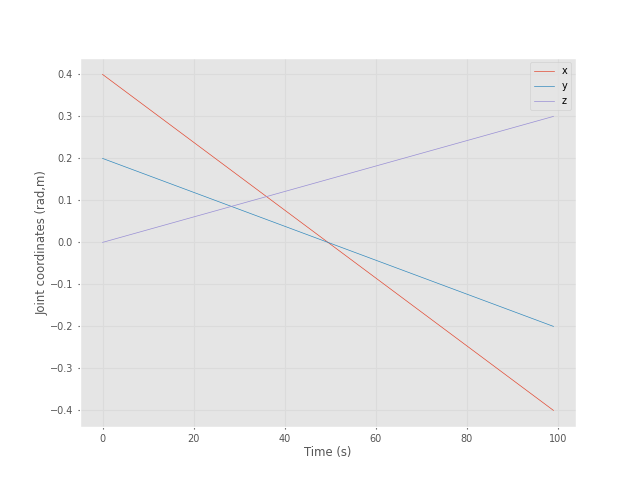

In [ ]:
xplot(P, labels="x y z");
#Визуализирует изменение координат x, y и z вдоль траектории.

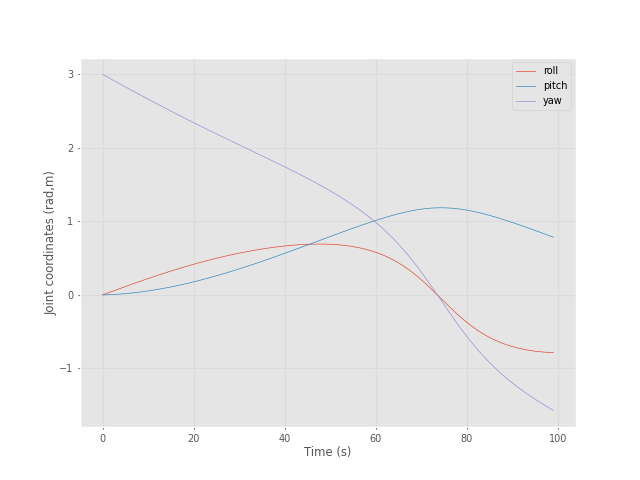

In [ ]:
rpy = Ts.rpy();
xplot(rpy, labels="roll pitch yaw");
#Вычисляет углы roll, pitch и yaw для каждой позиции в Ts и визуализирует их изменение вдоль траектории.

In [ ]:
HTML(Ts.animate(movie=True, dim=1.5))

In [ ]:
#Ts.animate()
plotvol3(new=True)  # for matplotlib/widget
HTML(Ts.animate(movie=True, dim=1.5))

In [ ]:
Ts = ctraj(T0, T1, 50);
#Генерирует траекторию с использованием функции ctraj, которая
#создает непрерывную траекторию между T0 и T1, равномерно распределяя 50 промежуточных позиций.

In [ ]:
#Ts.animate()
plotvol3(new=True)  # for matplotlib/widget
HTML(Ts.animate(movie=True, dim=1.5))

# 3.4 Application: Inertial Navigation


## 3.4.1 Gyroscopes


### 3.4.1.2 Estimating Orientation


In [ ]:
from imu_data import IMU
true, _ = IMU()
#класс IMU для симуляции или чтения данных инерциального измерительного устройства.
#Создается экземпляр IMU, который возвращает два значения: фактические данные сенсора (true)
# и, возможно, некие другие данные (игнорируются _).
# Фокус в данном случае на true, содержащем реальные показания гироскопа.

In [ ]:
orientation = UnitQuaternion();  # identity quaternion
#Инициализируется ориентация как единичный кватернион,
#представляющий начальную ориентацию без вращения.

In [ ]:
for w in true.omega[:-1]: #Проходит по каждому значению угловой скорости w из данных IMU, за исключением последнего значения.
 #NEXT
  #Для каждого шага угловая скорость w умножается на временной интервал true.dt
  #для получения изменения угла вращения, которое преобразуется в кватернион
  #с помощью UnitQuaternion.EulerVec(). Затем это изменение умножается на последнюю
  # ориентацию в списке orientation для получения новой ориентации.

  next = orientation[-1] @ UnitQuaternion.EulerVec(w * true.dt);
 #ORIENTATION
  #Новая ориентация добавляется к списку orientation, позволяя
  #построить последовательность ориентаций со временем.
  orientation.append(next);
len(orientation)

400

In [ ]:
#orientation.animate(time=true.t)
HTML(orientation.animate(time=true.t, movie=True, dim=1.5, color="red"))
#time=true.t указывает временные метки для каждой ориентации, а

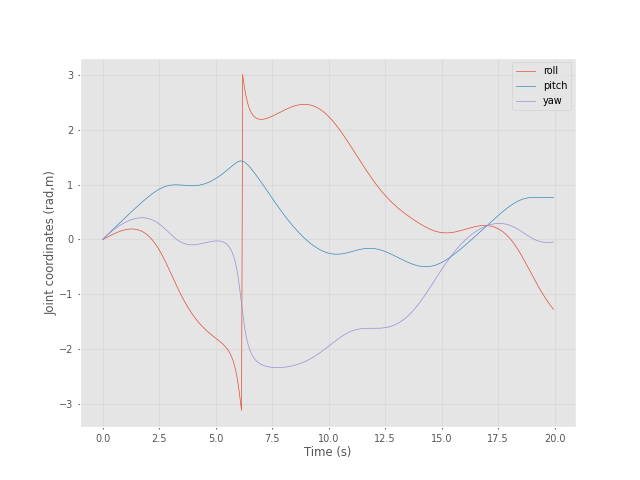

In [ ]:
xplot(true.t, orientation.rpy(), labels="roll pitch yaw");
#Визуализирует изменение углов roll, pitch и yaw во времени,
#преобразуя кватернионы в углы и используя временные метки из true.t.
#Это позволяет наглядно оценить изменение ориентации объекта.

## 3.4.4 Inertial Sensor Fusion


In [ ]:
from imu_data import IMU
true, imu = IMU()
#Получает истинную ориентацию (true.orientation) и данные ИМУ (imu),
#включая показания гироскопа (imu.gyro), акселерометра (imu.accel) и магнитометра (imu.magno).

q = UnitQuaternion();:
Инициализируется кватернион ориентации как единичный кватернион.
Цикл для данных гироскопа:
Итерации по показаниям гироскопа, пропуская последнее значение, и обновление ориентации на основе угловой скорости.
xplot(true.t, q.angdist(true.orientation), color="red");:
Визуализирует ангулярное расстояние между оцененной ориентацией и истинной ориентацией, показывая точность оценки ориентации на основе данных гироскопа.

In [ ]:
q = UnitQuaternion();
for wm in imu.gyro[:-1]:
  q.append(q[-1] @ UnitQuaternion.EulerVec(wm * imu.dt))

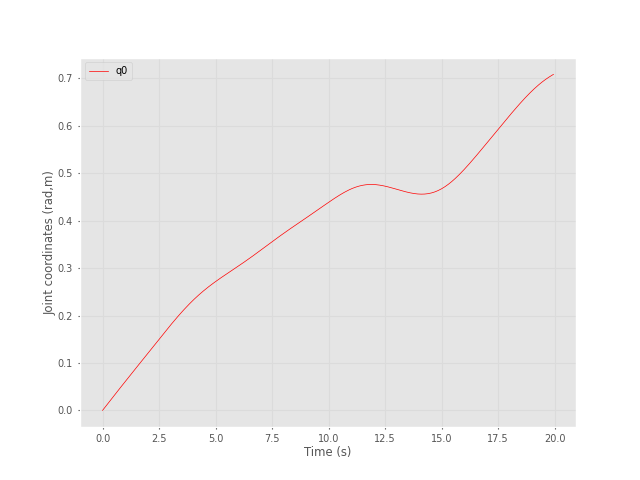

In [ ]:
xplot(true.t, q.angdist(true.orientation), color="red");
#Визуализирует ангулярное расстояние между оцененной ориентацией и
#истинной ориентацией, показывая точность оценки ориентации на основе данных гироскопа.

In [ ]:
kI = 0.2; kP = 1; #Коэффициенты для интегральной и пропорциональной составляющих в алгоритме слияния данных.
b = np.zeros(imu.gyro.shape); #Инициализируется массив смещений для угловой скорости.
qcf = UnitQuaternion(); #Инициализируется фильтрованный кватернион ориентации.
data = zip(imu.gyro[:-1], imu.accel[:-1], imu.magno[:-1]);

#Цикл для слияния данных:
#Итерации по показаниям гироскопа, акселерометра и магнитометра.
#Использование пропорционально-интегрального регулятора (PI-регулятор)
#для коррекции угловой скорости на основе сравнения измеренной силы тяжести
#и магнитного поля с их ожидаемыми значениями в локальной системе координат.

for k, (wm, am, mm) in enumerate(data):
  qi = qcf[-1].inv()
  sR = np.cross(am, qi * true.g) + np.cross(mm, qi * true.B)
  wp = wm - b[k,:] + kP * sR
  qcf.append(qcf[k] @ UnitQuaternion.EulerVec(wp * imu.dt))
  b[k+1,:] = b[k,:] - kI * sR * imu.dt

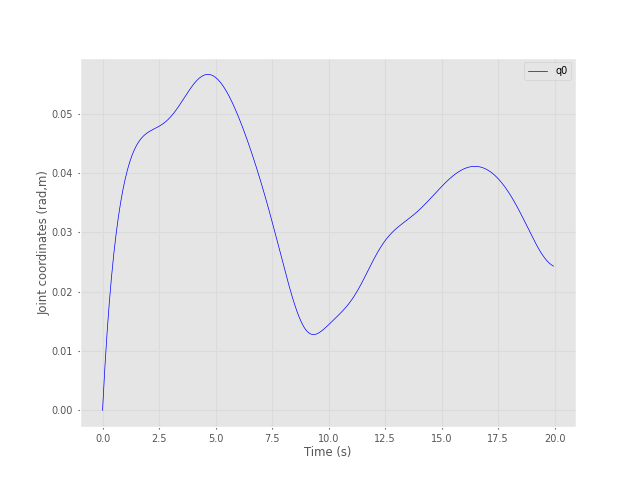

In [ ]:
xplot(true.t, qcf.angdist(true.orientation), color="blue");
#Визуализация ангулярного расстояния между оцененной ориентацией с
#использованием слияния данных и истинной ориентацией, показывая улучшенную точность оценк